<h2><center>Final Exam Part B</center><h2>
<h4><center>Submission by Chitrank Dave (8938766)</center></h4>

### **Fashion MNIST . . . with a Twist!**

##### Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans

### **PART A: Model Training and Evaluation**

In [59]:
# Loading the dataset
base_path = "../../practical_labs/datasets/ece657a-1221-asg3-fashionmnist-datafiles/"

X_train = pd.read_csv(f'{base_path}x_train.csv')
X_test = pd.read_csv(f'{base_path}x_test.csv')

y_train = pd.read_csv(f'{base_path}y_train.csv').values.ravel()
y_test = pd.read_csv(f'{base_path}y_test.csv').values.ravel()

In [60]:
print(f'x_train shape: {X_train.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [61]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=784)

In [62]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [78]:
scores = {}
test_metrics = {}
folds = 5
estimator = 10

In [65]:
def process_and_get_score_mean(classifier, classifier_name):
    scores_dt = cross_val_score(classifier, X_train, y_train, cv=folds)
    scores[classifier_name] = scores_dt.mean()
    classifier.fit(X_train, y_train)

##### Baseline Model

In [66]:
shallow_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
process_and_get_score_mean(
    classifier=shallow_classifier, classifier_name="DecisionTreeClassifier")

In [69]:
shallow_classifier

DecisionTreeClassifier(max_depth=5, random_state=42)

##### Bagging Method

In [70]:

bagging_classifier = BaggingClassifier(
    estimator=shallow_classifier, n_estimators=estimator, random_state=42)
process_and_get_score_mean(
    classifier=bagging_classifier, classifier_name="BaggingClassifier")

In [72]:
bagging_classifier

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  random_state=42)

##### Boosting Method 

In [74]:
boosting_classifier = AdaBoostClassifier(
    estimator=shallow_classifier, n_estimators=estimator, random_state=42)
process_and_get_score_mean(
    classifier=boosting_classifier, classifier_name="AdaBoostClassifier")
boosting_classifier

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   n_estimators=10, random_state=42)

In [75]:
y_pred_DTC = shallow_classifier.predict(X_test)
y_pred_BC = bagging_classifier.predict(X_test)
y_pred_ADAC = boosting_classifier.predict(X_test)

##### Validation

In [76]:
def calulate_metrics(y_pred1):
    return [accuracy_score(y_pred1, y_test),
            precision_score(y_pred1, y_test, average='weighted'),
            recall_score(y_pred1, y_test, average='weighted'),
            f1_score(y_pred1, y_test, average='weighted')]

In [80]:
test_metrics['DecisionTreeClassifier'] = calulate_metrics(y_pred_DTC)
test_metrics['BaggingClassifier'] = calulate_metrics(y_pred_BC)
test_metrics['AdaBoostClassifier'] = calulate_metrics(y_pred_ADAC)

In [81]:
metrics_df = pd.DataFrame(test_metrics).T
metrics_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 score']
metrics_df

,Accuracy,Precision,Recall,F1 score
DecisionTreeClassifier,0.7531,0.759652,0.7531,0.753305
BaggingClassifier,0.7680,0.775966,0.7680,0.768276
AdaBoostClassifier,0.6871,0.732963,0.6871,0.683339


##### Breakdown 
DecisionTreeClassifier: This model achieves a decent accuracy of 75.31%, but its other metrics (precision, recall, and F1-score) are quite similar, suggesting a potential bias towards the majority class.

**BaggingClassifier**: Using bagging with Decision Trees as the **base estimator** improves the performance across all metrics compared to the base model. Accuracy increases to 76.80%, and precision, recall, and F1-score also show slight improvements. This suggests that bagging helps reduce variance and improve the overall robustness of the model.

AdaBoostClassifier: Surprisingly, Adaboost Classifier performs worse than both Decision Trees and Bagging in this case. Its accuracy is much lower at 68.71%, and the other metrics also suffer.


**Result**: Bagging Classifier is the best classifier here and reason is its ability to reduce variance and improve robustness and it benefits from the ensemble effect. Bagging also tends to smooth out the decision boundaries created by individual trees.

---
### **Part B: Guessing the Mystery Label**

PCA

In [84]:
data_point = 2

In [85]:
pca = PCA(n_components=data_point)
X_train_pca = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data={'PC1': X_train_pca[:, 0],
                            'PC2': X_train_pca[:, 1],
                            'Label': y_train}
                      )

In [86]:
pca_df

,PC1,PC2,Label
0,-123.993791,1633.074396,4
1,1407.928853,-451.641336,0
2,-725.910795,-1101.838137,0
3,31.398664,-981.067672,4
4,804.119258,-1201.168720,0
...,...,...,...
59995,-1725.093422,-41.582509,1
59996,-27.515977,-1454.424894,2
59997,857.750196,-1180.240183,4
59998,-807.476526,-581.218873,0


In [90]:
pca_df.describe()

,PC1,PC2,Label
count,6.000000e+04,6.000000e+04,60000.000000
mean,-4.183676e-14,4.304942e-14,2.300000
std,1.134959e+03,8.874663e+02,1.486619
min,-2.045934e+03,-1.703465e+03,0.000000
25%,-9.578803e+02,-7.372241e+02,1.000000
50%,-2.362111e+01,6.532969e+01,2.500000
75%,8.923455e+02,6.726763e+02,4.000000
max,2.805441e+03,2.418147e+03,4.000000


In [87]:
lda = LDA(n_components=data_point)
X_train_lda = lda.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(data={'LD1': X_train_lda[:, 0],
                            'LD2': X_train_lda[:, 1],
                            'Label': y_train}
                      )

In [88]:
lda_df

,LD1,LD2,Label
0,-0.572484,-1.479349,4
1,-1.558944,-1.607360,0
2,-1.076877,-0.593398,0
3,-1.962629,0.270634,4
4,-1.330500,-0.552790,0
...,...,...,...
59995,2.241588,-0.271132,1
59996,-2.310595,2.985941,2
59997,-1.073094,-2.391259,4
59998,-0.835734,0.177714,0


In [89]:
lda_df.describe()

,LD1,LD2,Label
count,6.000000e+04,6.000000e+04,60000.000000
mean,-5.163277e-17,7.448856e-17,2.300000
std,2.186391e+00,1.555435e+00,1.486619
min,-5.306089e+00,-4.775164e+00,0.000000
25%,-1.649235e+00,-1.141601e+00,1.000000
50%,-7.586738e-01,-2.168115e-01,2.500000
75%,1.724970e+00,8.959148e-01,4.000000
max,7.757778e+00,5.305593e+00,4.000000


Visualization

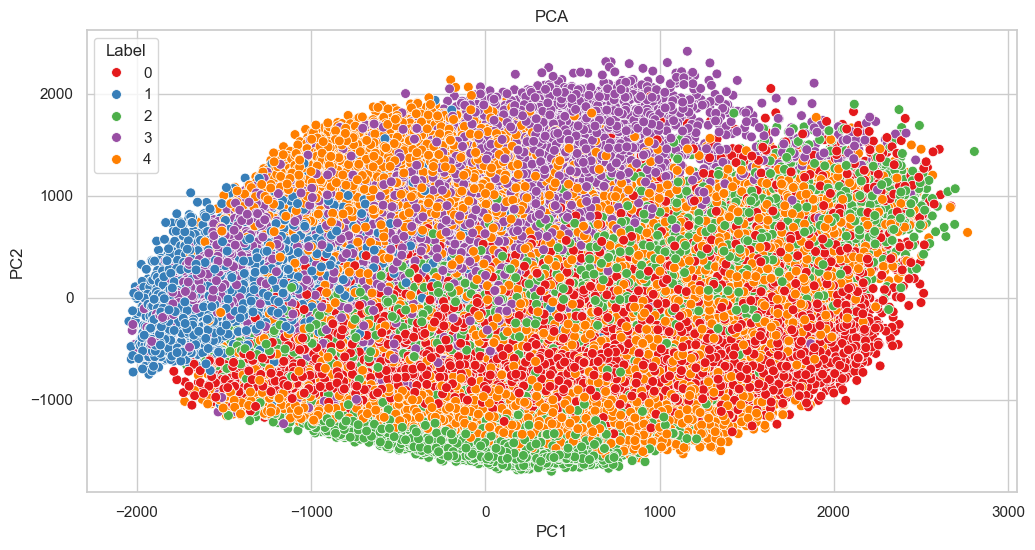

In [100]:
#PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Label', palette='Set1', marker='o', s=50)
plt.title('PCA')
plt.show()

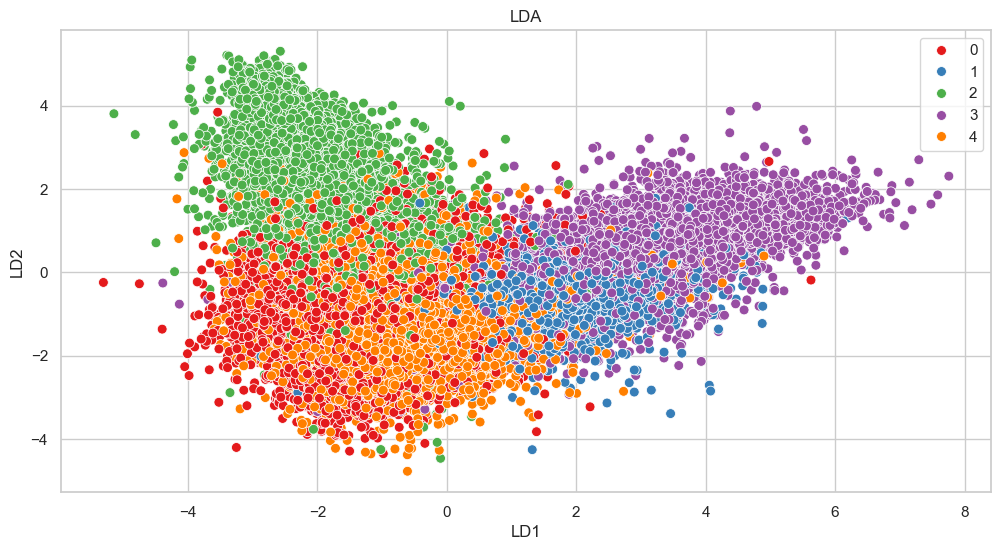

In [101]:
# LDA
lda = LDA(n_components=data_point)
x_lda = lda.fit_transform(X_train, y_train)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LD1', y='LD2', hue=y_train, data=lda_df,
                palette='Set1', marker='o', s=50)
plt.title('LDA')
plt.show()

K-Means Visualization

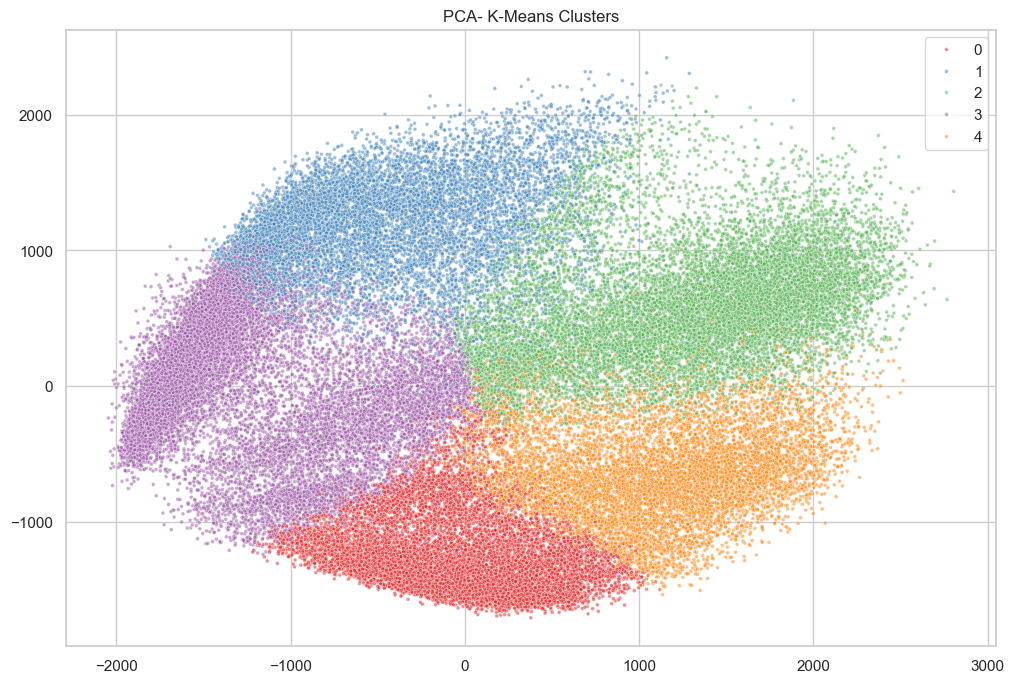

In [112]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1],
                hue=kmeans_labels, palette='Set1', marker='.', s=30, alpha=0.5)
plt.title('PCA- K-Means Clusters')
plt.show()

##### While K-Means effectively clusters the majority of the data, some data points remain overlapping. These overlapping points may represent areas where the model struggles to assign clear cluster membership.

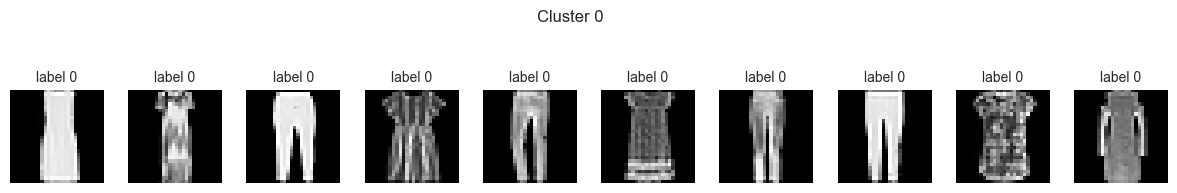

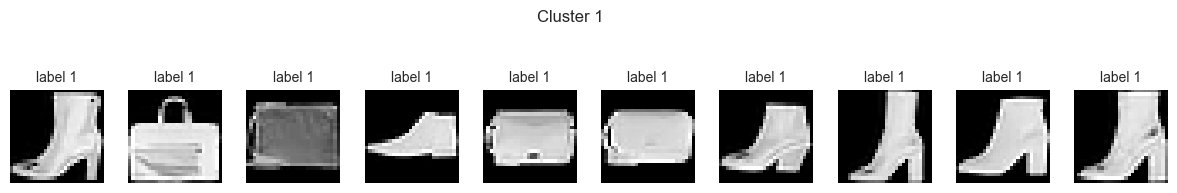

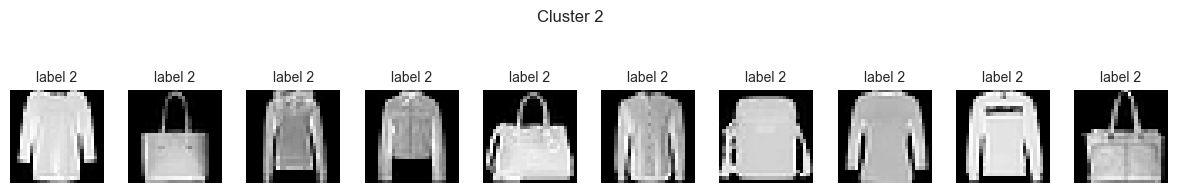

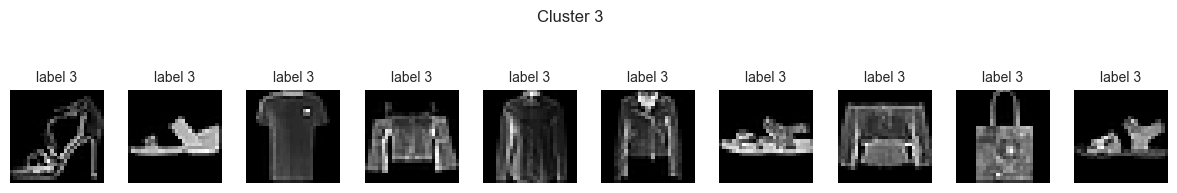

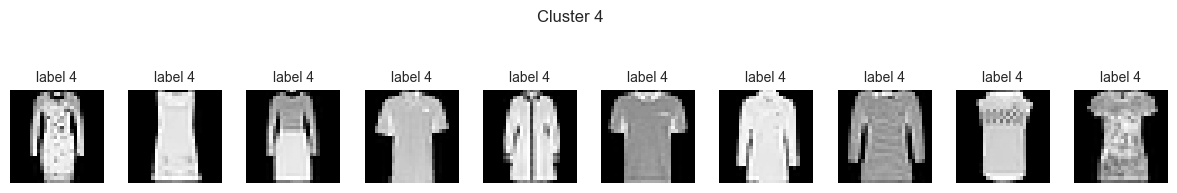

In [133]:
rows, cols = 5, 10
label = [0, 1, 2, 3, 4]

# Create and configure figures
figs = [plt.figure(figsize=(15, 8)) for _ in range(rows)]

# Plot random samples
for cluster in range(5):
    fig = figs[cluster]
    fig.suptitle(f"Cluster {cluster}", fontsize=12)
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    random_sample_indices = np.random.choice(
        cluster_indices, cols, replace=False)
    for i, sample_index in enumerate(random_sample_indices):
        ax = figs[cluster].add_subplot(rows, cols, i+1)
        ax.imshow(X_train.iloc[sample_index].values.reshape(
            28, 28), cmap="gray")
        ax.set_title(f"label {label[cluster]}", fontsize=10)
        ax.axis("off")

plt.show()

##### Labels for the given dataset:
* Label 0:  Pants
* Label 1:  Boots
* Label 2:  Long sleeve shirt
* Label 3:  Sandals
* Label 4:  T-shirt